In [1]:

import numpy as np 
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
import scipy.stats as ss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

import os
print(os.listdir("../input"))


Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

['travel insurance.csv']


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [27]:
df=pd.read_csv("../input/travel insurance.csv")
df1=df
df.head(7)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
Agency                  63326 non-null object
Agency Type             63326 non-null object
Distribution Channel    63326 non-null object
Product Name            63326 non-null object
Claim                   63326 non-null object
Duration                63326 non-null int64
Destination             63326 non-null object
Net Sales               63326 non-null float64
Commision (in value)    63326 non-null float64
Gender                  18219 non-null object
Age                     63326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


So, there are 4 numerical columns and 7 categorical columns

Now, lets check which columns have the null values

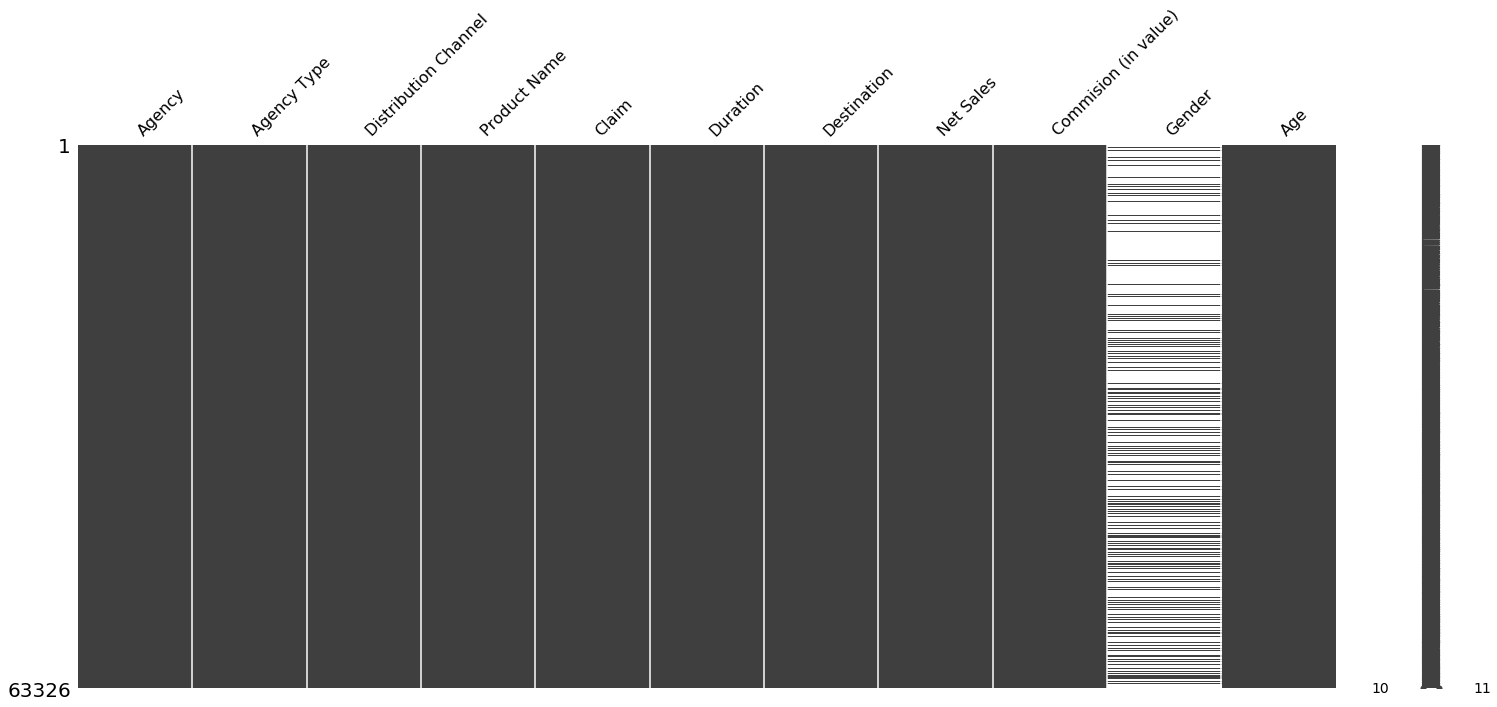

In [4]:
missingno.matrix(df)

"Black" in the data depicts the column is fill with data and "White" depicts they have null values in that particular area

So, we can conclude that only "Gender" have the null values and seems quite much

Lets see whats the number of null values in the "Gender" column

In [5]:
df['Gender'].isnull().sum()

45107

45107/63326 are null values, nearly 71.2% data in the column are null values.

I have removed the Gender feature since only less than 30% of data exist.

In [6]:
df=df.drop(['Gender'], axis = 1) 

In [7]:
df.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

There is no null values now

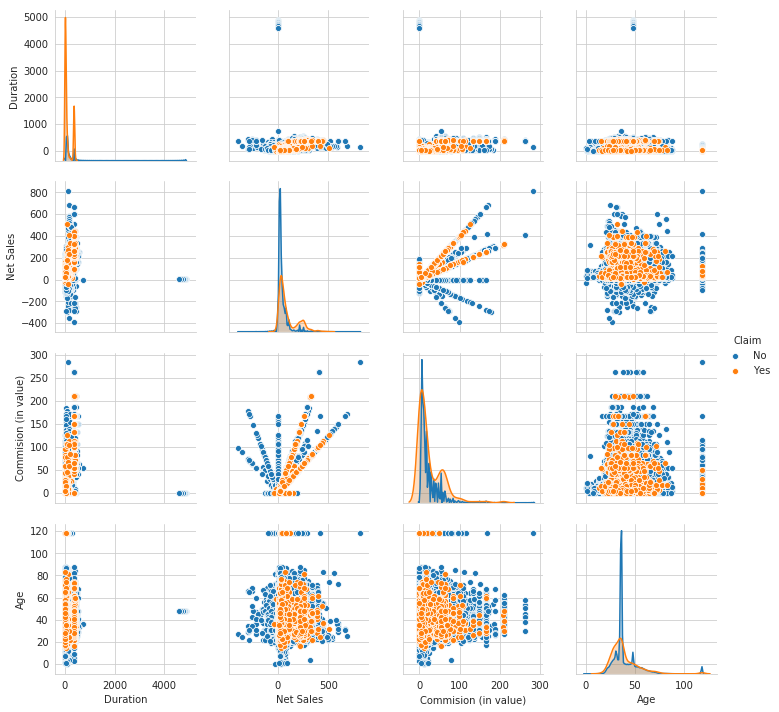

In [8]:

sns.set_style("whitegrid");
sns.pairplot(df, hue="Claim");
plt.show()

From the above we can come to below conclusions:

1. Here we clearly see that Commision and Net Values are corelated and distributions look same (linearlly distributed).
2. So we can drop any of the feature 'Commision' or 'Net Sales'. So that it should not effect the Model. 
3. Also there won't be a -Ve values in Net Sales Amount. Might be outliers, these should be removed. 
4. We observe ~20% of insured are in 35-40 Age.

Lets remove Commision Feature

In [9]:
df=df.drop(['Commision (in value)'], axis = 1) 

In [10]:
print(df['Agency Type'].unique())
print(df['Product Name'].unique())
print(df['Distribution Channel'].unique())


['Travel Agency' 'Airlines']
['Comprehensive Plan' 'Rental Vehicle Excess Insurance' 'Value Plan'
 'Basic Plan' 'Premier Plan' '2 way Comprehensive Plan' 'Bronze Plan'
 'Silver Plan' 'Annual Silver Plan' 'Cancellation Plan'
 '1 way Comprehensive Plan' 'Ticket Protector' '24 Protect' 'Gold Plan'
 'Annual Gold Plan' 'Single Trip Travel Protect Silver'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Child Comprehensive Plan'
 'Travel Cruise Protect' 'Travel Cruise Protect Family']
['Offline' 'Online']


**Lets check the data in "Duration" column**

In [11]:
df['Duration'].describe()

count    63326.000000
mean        49.317074
std        101.791566
min         -2.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

We have negative values in this Duration column but can time be negative? **YES** (telling based on domain knowledge)

This is due to timezone difference. for ex: 12:10 AM 18/3/2021 you tavelled by a flight which is one way and reached some other country where the timezone is now 11:50 PM 17/3/2021.

In this case they will try to store the duration value as -1 in the database. 





**Lets see how many negative values we have in Duration column**

In [12]:
for i in range(len(df)):
    if df['Duration'][i]<0:
        print(df['Duration'].iloc[i])


-2
-1
-1
-1
-1


In [13]:
df.loc[df['Duration'] < 0, 'Duration'] = 1

Net sales can't be negative. so removing those records.

In [14]:
df=df[df['Net Sales'] > 0]

df['Net Sales'].describe()

count    60764.000000
mean        43.098282
std         47.786060
min          0.070000
25%         19.800000
50%         28.000000
75%         49.500000
max        810.000000
Name: Net Sales, dtype: float64

In [15]:
df_numerical=df._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60764 entries, 21 to 63325
Data columns (total 3 columns):
Duration     60764 non-null int64
Net Sales    60764 non-null float64
Age          60764 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.9 MB


Text(0.5, 1.0, 'Destination')

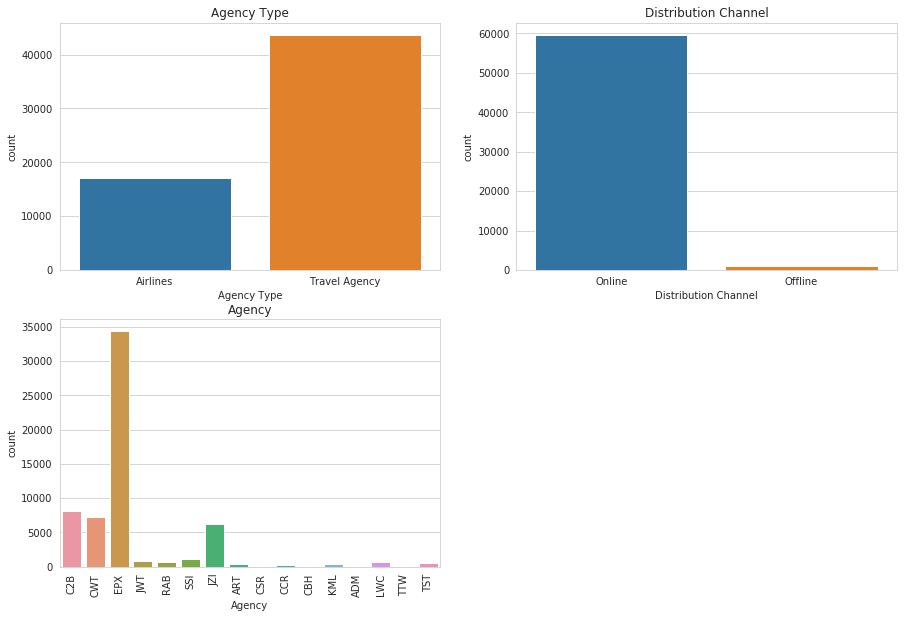

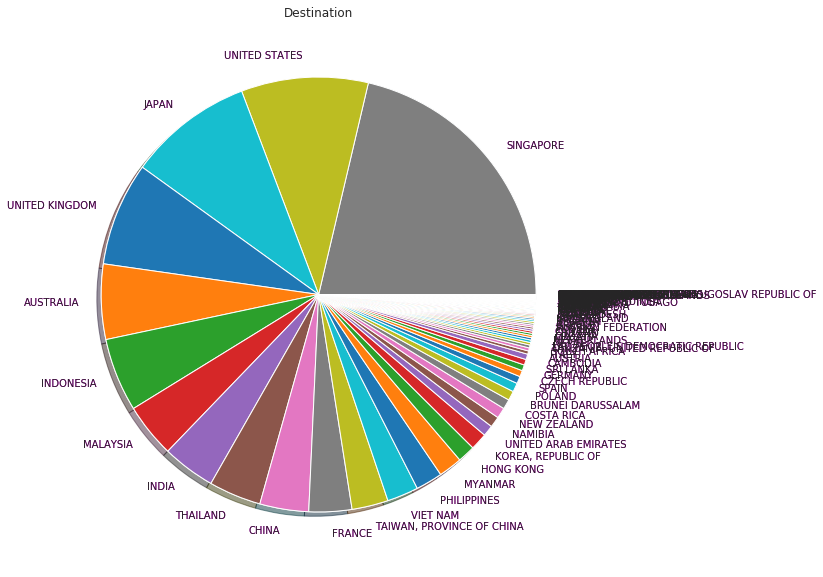

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df['Agency Type'])
plt.title('Agency Type')
plt.subplot(2,2,2)
sns.countplot(df['Distribution Channel'])
plt.title('Distribution Channel')

plt.subplot(2,2,3)
sns.countplot(df['Agency'])
plt.xticks(rotation=90)
plt.title('Agency')


#checking distriubution for destination in dataset, Please ignore the mess at pie we can consider those as others
plt.figure(figsize=(15,10))

wedges, texts = plt.pie(df['Destination'].value_counts(),    
                                  labels = df['Destination'].unique(), 
                                  shadow = True,
                                  textprops = dict(color ="magenta")) 


plt.pie(df['Destination'].value_counts(),labels=df['Destination'].unique())
plt.title('Destination')

Taking only Top 25 Destinations and keeping the rest destinations as "Others" 

In [17]:
dest=df['Destination'].value_counts()
dest=dict(dest[:25])
dest=dest.keys()
df.loc[~df.Destination.isin(dest), 'Destination'] = 'Others'
dest=df['Destination'].value_counts()
print(dest)

SINGAPORE                    12958
THAILAND                      5735
MALAYSIA                      5643
CHINA                         4675
Others                        3459
INDONESIA                     3393
AUSTRALIA                     3316
PHILIPPINES                   2442
UNITED STATES                 2400
HONG KONG                     2364
INDIA                         2206
JAPAN                         1937
VIET NAM                      1641
KOREA, REPUBLIC OF            1416
UNITED KINGDOM                1210
TAIWAN, PROVINCE OF CHINA     1069
MYANMAR                        793
BRUNEI DARUSSALAM              769
NEW ZEALAND                    492
CAMBODIA                       488
CANADA                         480
FRANCE                         441
GERMANY                        423
ITALY                          402
NETHERLANDS                    327
SPAIN                          285
Name: Destination, dtype: int64


Converting Agency, Product Name, Destination, Agency Type and Distribution Channel Features from categorical to numeric feature using one hot encoding.

In [18]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Agency Type','Distribution Channel'])
# df_onehot=df_onehot.drop(['Commision (in value)'], axis = 1)
print(df_onehot.shape)

(60764, 11)


In [19]:
df_numerical=df_onehot._get_numeric_data()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60764 entries, 21 to 63325
Data columns (total 7 columns):
Duration                        60764 non-null int64
Net Sales                       60764 non-null float64
Age                             60764 non-null int64
Agency Type_Airlines            60764 non-null uint8
Agency Type_Travel Agency       60764 non-null uint8
Distribution Channel_Offline    60764 non-null uint8
Distribution Channel_Online     60764 non-null uint8
dtypes: float64(1), int64(2), uint8(4)
memory usage: 2.1 MB


Updating the Claim column to 1 or 0. 
here, '1' says 'Claimed' and '0' says 'Not Claimed'

In [20]:
df['Claim'].value_counts()
df.loc[df['Claim'] == 'Yes', 'Claim'] = 1
df.loc[df['Claim'] == 'No', 'Claim'] = 0
df['Claim'].value_counts()

0    59840
1      924
Name: Claim, dtype: int64

In [21]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Agency Type','Distribution Channel'])
# df_onehot=df_onehot.drop(['Commision (in value)'], axis = 1)
print(df_onehot.head())
df_numerical=df_onehot._get_numeric_data()
df_numerical.info()
df['Claim'].value_counts()
df.loc[df['Claim'] == 'Yes', 'Claim'] = 1
df.loc[df['Claim'] == 'No', 'Claim'] = 0
df['Claim'].value_counts()

   Agency        Product Name  Claim  Duration Destination  Net Sales  Age  \
21    C2B         Bronze Plan      0        12   SINGAPORE      46.15   44   
22    C2B         Bronze Plan      0         7   SINGAPORE      17.55   25   
23    C2B         Bronze Plan      1        12   SINGAPORE      94.00   34   
24    C2B         Silver Plan      0       190   SINGAPORE     294.75   26   
25    C2B  Annual Silver Plan      0       364   SINGAPORE     389.00   30   

    Agency Type_Airlines  Agency Type_Travel Agency  \
21                     1                          0   
22                     1                          0   
23                     1                          0   
24                     1                          0   
25                     1                          0   

    Distribution Channel_Offline  Distribution Channel_Online  
21                             0                            1  
22                             0                            1  
23      

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0    59840
1      924
Name: Claim, dtype: int64

Here is can see the data set is Completely imbalanced.

I have tried below methods to get the best model,
1. OverSampling
2. UnderSampling
3. SMOTE
4. giving Weighted sums
5. changing models like logistic regression, SVM, DT, Random Forest and Bossting algorithm also.

Fortunately Random Forest with balancing the Class weight according to dataset gave me the best Metrics.

In [22]:

from sklearn.ensemble import RandomForestClassifier
Y = df['Claim']
X=df_numerical
print(X.shape)
print(Y.shape)
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(  
X, Y, test_size = 0.3, random_state = 100, stratify=Y)

clf =  RandomForestClassifier(n_estimators=100,random_state=0,class_weight={0: 1, 1: 98.5})
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print('score on test set:', clf.score(X_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))

(60764, 8)
(60764,)
score on test set: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17953
           1       1.00      1.00      1.00       277

    accuracy                           1.00     18230
   macro avg       1.00      1.00      1.00     18230
weighted avg       1.00      1.00      1.00     18230



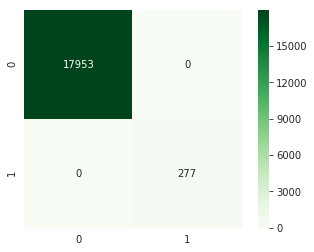

In [23]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test, pred)
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar='True', cmap=plt.cm.Greens)

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
scores = clf.predict_proba(X_test)
print(scores)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [25]:
y_test.value_counts()

0    17953
1      277
Name: Claim, dtype: int64

In [26]:
try:
    print(roc_auc_score(y_test,pred))
except ValueError:
    pass


1.0


Finally my model predicts mostly correct. 
F1-Score-1.0 for the test data.
